In [1]:
# Imports, always include this at the beginning

# No science without NumPy
import numpy as np

# Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib notebook

# Of course we want Glotaran
import glotaran as gta
# This things we just need for simulations, you can leave them out for fitting
from lmfit import Parameters

In [2]:
# First we define our model specification. See the documentation for details how to do so.
model_spec = '''
type: kinetic

parameters: [101e-1, 202e-5,505e-6]

compartments: [s1, s2, s3]

megacomplexes:
    - label: mc1
      k_matrices: [k1]

k_matrices:
  - label: "k1"
    matrix: {
      '("s1","s1")': 1,
      '("s2","s2")': 2,
      '("s3","s3")': 3,
}

initial_concentrations: []

irf: []

shapes:
  - label: "shape1"
    type: "gaussian"
    amplitude: shape.1
    location: shape.2
    width: shape.3
  - ["shape3", "gaussian", shape.6, shape.7, shape.8]

datasets: 
  - label: dataset1
    type: spectral
    megacomplexes: [mc1]
'''

# Then we can create our model
model = gta.parse(model_spec)

In [3]:
# Now let us define some simulation parameters
sim_params = Parameters()
sim_params.add("p_1", 101e-3)
sim_params.add("p_2",202e-4)
sim_params.add("p_3",505e-5)

# We also need a spectral, a time axis and some amplitudes
spectral_axis = np.arange(600, 750, 1)
time_axis = np.arange(0, 1500, 1.5)
amplitudes = [1,0.1,7]

# Now we can simulate the data
model.simulate('dataset1', {"spectral": spectral_axis, "time": time_axis}, parameter=sim_params)

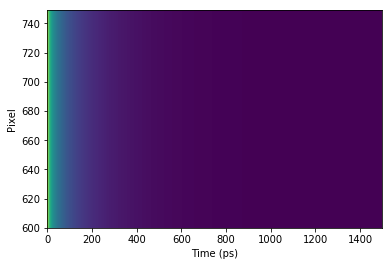

In [4]:
# Plot the simulated data

data = model.datasets["dataset1"].data.data

fig = plt.figure()
plt.xlabel('Time (ps)')
plt.ylabel('Pixel')
plt.pcolormesh(time_axis, spectral_axis, data)
plt.show()

In [5]:
result = model.fit()

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7824e+03                                    9.52e+05    
       1              2         4.9794e+02      2.28e+03       1.01e+01       1.35e+05    
       2              3         3.2409e+02      1.74e+02       3.26e-03       5.14e+04    
       3              5         2.4604e+02      7.80e+01       3.43e-03       3.69e+04    
       4              6         1.5728e+02      8.88e+01       6.86e-03       4.60e+04    
       5              7         3.8757e+01      1.19e+02       1.08e-02       1.11e+04    
       6              8         1.6346e+01      2.24e+01       1.37e-02       1.12e+03    
       7             10         1.1571e+01      4.78e+00       4.83e-03       8.80e+02    
       8             11         1.0188e+01      1.38e+00       9.65e-03       6.15e+03    
       9             12         6.4859e+00      3.70e+00       9.65e-03       1.07e+04    

In [6]:
result.best_fit_parameter.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
p_1    0.0202     -inf      inf     None     True     None     None
p_2     0.101     -inf      inf     None     True     None     None
p_3   0.00505     -inf      inf     None     True     None     None
